# Solving function optimization using ACO


The Rosenbrock function, also referred to as the Valley or Banana function, is a popular test problem for gradient-based optimization algorithms. It is shown in the plot above in its two-dimensional form.

Formula:  $f(x) = \sum_{i=1}^{d-1} (100 \times (x_{i+1}-x_i^2)^2 + (x_i-1)^2)$

For 2d function: $f(x,y) = 100 \times (y-x^2)^2 + (1-x)^2$

Dimensions: d

Input Domain: The function is usually evaluated on the hypercube $x_i \in [-5, 10]$ for all $i=1,...,d$. The domain may be restricted to  $x_i \in [-2.048, 2.048]$ for all $i=1,...,d$

Global Minimum: This function has global minimum at f(x*)= 0.0 located at (1,...,1).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Define and visualize the Rosenbrock function

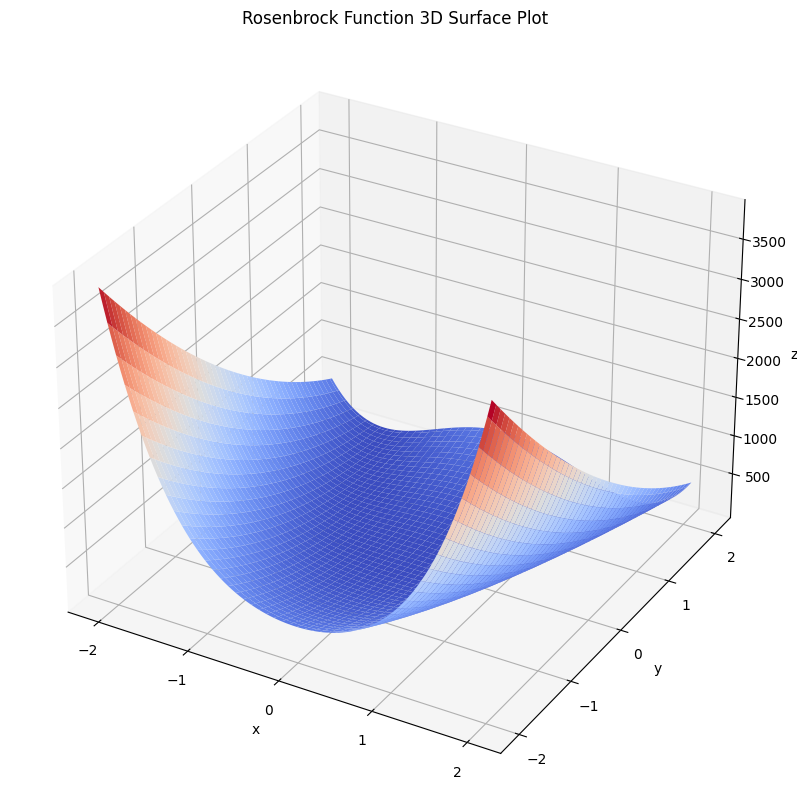

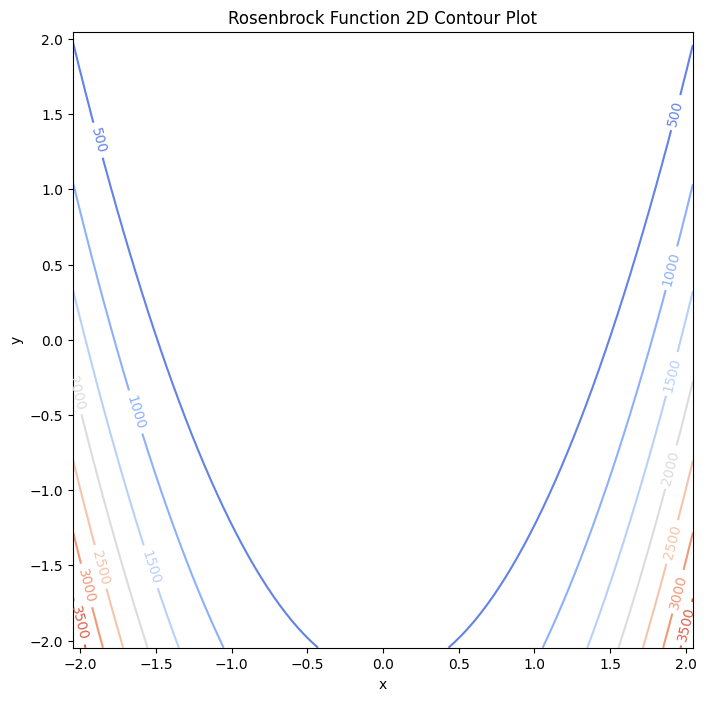

In [4]:
def rosenbrock_function(cand_soln):
    return (1 - cand_soln[0]) ** 2 + 100 * (cand_soln[1] - cand_soln[0] ** 2) ** 2

# Create a meshgrid of x and y values
x = np.linspace(-2.048, 2.048, 100)
y = np.linspace(-2.048, 2.048, 100)
X, Y = np.meshgrid(x, y)
X = np.array(X)
Y = np.array(Y)

# Calculate Rosenbrock function values for each point in the mesh grid
Z = np.array([[rosenbrock_function([x, y]) for x, y in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])
# Flatten Z to a 2D array
Z = Z.flatten().reshape(len(X), len(Y))

# Create a 3D surface plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Rosenbrock Function 3D Surface Plot')

# Create a 2D contour plot
fig, ax = plt.subplots(figsize=(8, 8))
contour = ax.contour(X, Y, Z, cmap='coolwarm')
ax.clabel(contour, inline=True, fontsize=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Rosenbrock Function 2D Contour Plot')

# Show the plots
plt.show()

### Create ACO solver

In [5]:
class ACO:
    def __init__(self, ants, generations, lower_bound, upper_bound, phi, rho):
        self.ants = ants
        self.generations = generations
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.phi = phi
        self.rho = rho
        self.dim = len(lower_bound)
        self.sigma = (upper_bound - lower_bound) / 6

    def optimize(self):
        best_cost = float("inf")
        best_solution = None

        for gen in range(self.generations):
            for ant in range(self.ants):
                current_solution = np.random.uniform(self.lower_bound, self.upper_bound, self.dim)
                current_cost = rosenbrock_function(current_solution)

                if current_cost < best_cost:
                    best_cost = current_cost
                    best_solution = current_solution

                for i in range(self.dim):
                    mean = best_solution[i]
                    sd = self.sigma[i]

                    new_value = np.random.normal(mean, sd)
                    new_value = np.clip(new_value, self.lower_bound[i], self.upper_bound[i])
                    current_solution[i] = new_value

                self.sigma *= self.phi
                self.sigma = np.maximum(self.sigma, self.rho * (self.upper_bound - self.lower_bound))

        return best_solution, best_cost

### Set up the solver and apply it to solve the problem

In [7]:
ants = 50
generations = 100
lower_bound = np.array([-2.048, -2.048])
upper_bound = np.array([2.048, 2.048])
phi = 0.95
rho = 0.01

aco = ACO(ants, generations, lower_bound, upper_bound, phi, rho)
solution, cost = aco.optimize()

print(f"Best solution: {solution}")
print(f"Cost at best solution: {cost}")

Best solution: [0.98523416 0.97417562]
Cost at best solution: 0.001009718243606697


### Visualize the solution

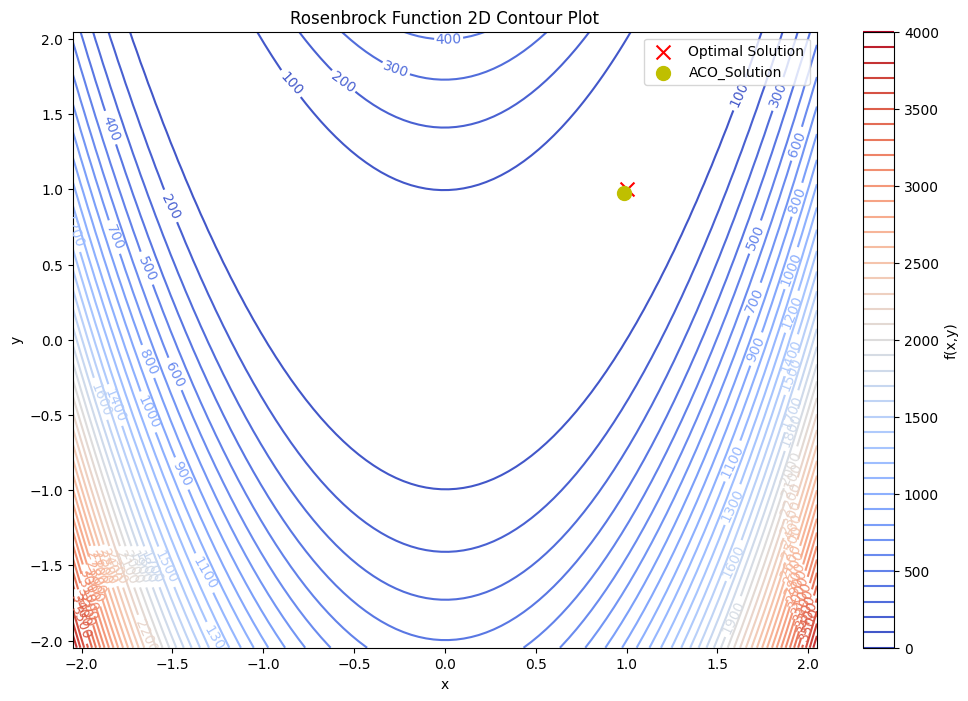

In [29]:
# Create a 2D contour plot
fig, ax = plt.subplots(figsize=(12, 8))
contour = ax.contour(X, Y, Z, cmap='coolwarm', levels=40)
ax.scatter(1, 1, c='r', marker='x', s=100, label='Optimal Solution')
ax.scatter(solution[0], solution[1], c='y', marker='o', s=100, label='ACO_Solution')
ax.clabel(contour, inline=True, fontsize=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Rosenbrock Function 2D Contour Plot')
ax.legend()
plt.colorbar(contour, label='f(x,y)')

# Show the plots
plt.show()